#### MACHINE LEARNING
Twitter sentiment % scores were used to classify tweets into positive, negative and neutral sentiment. 

Algorithms used for analysis:
- Random Forest Classifier
- Regression

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt
import matplotlib.pyplot as plt
import csv
import random
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
%matplotlib inline 

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/coneychiwabee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
twtr = pd.read_csv('SentimentHistorical.csv', names=('SEARCH','POSITIVE','NEGATIVE','NEUTRAL','DATETIME','MONTH','DAY','HOUR','MIN','SEC','COUNT','PRICE'))
twtr

,SEARCH,POSITIVE,NEGATIVE,NEUTRAL,DATETIME,MONTH,DAY,HOUR,MIN,SEC,COUNT,PRICE
0,('Bitcoin',26.804124,11.340206,61.855670,datetime.datetime(2021,6,17,23,50,16,126196),37891.6)
1,('Bitcoin',32.584270,6.741573,60.674157,datetime.datetime(2021,6,17,23,50,47,509078),37891.6)
2,('Bitcoin',39.080460,2.298851,58.620690,datetime.datetime(2021,6,17,23,51,18,725670),37920.8)
3,('Bitcoin',32.954545,5.681818,61.363636,datetime.datetime(2021,6,17,23,51,49,950721),37918.9)
4,('Bitcoin',26.966292,15.730337,57.303371,datetime.datetime(2021,6,17,23,52,21,157071),37918.9)
...,...,...,...,...,...,...,...,...,...,...,...,...
1906,('Bitcoin',40.789474,7.894737,51.315789,datetime.datetime(2021,6,19,0,42,12,152020),35201.93)
1907,('Bitcoin',45.348837,6.976744,47.674419,datetime.datetime(2021,6,19,2,42,40,642070),35833.32)
1908,('Bitcoin',39.772727,6.818182,53.409091,datetime.datetime(2021,6,19,6,43,8,297527),35790.57)
1909,('Bitcoin',44.897959,14.285714,40.816327,datetime.datetime(2021,6,19,9,8,54,792914),35667.29)


In [4]:
twtr_data = twtr.drop(['SEARCH','HOUR','MIN','SEC','COUNT'], axis=1)
twtr_data['DATETIME'] = twtr_data.DATETIME.str.replace('datetime.datetime','')
twtr_data['DATETIME'] = twtr_data.DATETIME.str.replace('(','')
twtr_data['PRICE'] = twtr_data.PRICE.str.replace(')','')
twtr_data['PRICE'] = twtr_data['PRICE'].astype(float)
twtr_data

,POSITIVE,NEGATIVE,NEUTRAL,DATETIME,MONTH,DAY,PRICE
0,26.804124,11.340206,61.855670,2021,6,17,37891.60
1,32.584270,6.741573,60.674157,2021,6,17,37891.60
2,39.080460,2.298851,58.620690,2021,6,17,37920.80
3,32.954545,5.681818,61.363636,2021,6,17,37918.90
4,26.966292,15.730337,57.303371,2021,6,17,37918.90
...,...,...,...,...,...,...,...
1906,40.789474,7.894737,51.315789,2021,6,19,35201.93
1907,45.348837,6.976744,47.674419,2021,6,19,35833.32
1908,39.772727,6.818182,53.409091,2021,6,19,35790.57
1909,44.897959,14.285714,40.816327,2021,6,19,35667.29


In [5]:
twtr_data.dtypes

POSITIVE    float64
NEGATIVE    float64
NEUTRAL     float64
DATETIME     object
MONTH         int64
DAY           int64
PRICE       float64
dtype: object

In [6]:
twtr_data['DATE'] = twtr_data['DATETIME'].map(str) + '-' + twtr_data['MONTH'].map(str) + '-' + twtr_data['DAY'].map(str) 
twtr_data

,POSITIVE,NEGATIVE,NEUTRAL,DATETIME,MONTH,DAY,PRICE,DATE
0,26.804124,11.340206,61.855670,2021,6,17,37891.60,2021-6-17
1,32.584270,6.741573,60.674157,2021,6,17,37891.60,2021-6-17
2,39.080460,2.298851,58.620690,2021,6,17,37920.80,2021-6-17
3,32.954545,5.681818,61.363636,2021,6,17,37918.90,2021-6-17
4,26.966292,15.730337,57.303371,2021,6,17,37918.90,2021-6-17
...,...,...,...,...,...,...,...,...
1906,40.789474,7.894737,51.315789,2021,6,19,35201.93,2021-6-19
1907,45.348837,6.976744,47.674419,2021,6,19,35833.32,2021-6-19
1908,39.772727,6.818182,53.409091,2021,6,19,35790.57,2021-6-19
1909,44.897959,14.285714,40.816327,2021,6,19,35667.29,2021-6-19


In [7]:
sentiment_df = twtr_data[['DATE','POSITIVE','NEGATIVE','NEUTRAL','PRICE']].copy()
sentiment_df 

,DATE,POSITIVE,NEGATIVE,NEUTRAL,PRICE
0,2021-6-17,26.804124,11.340206,61.855670,37891.60
1,2021-6-17,32.584270,6.741573,60.674157,37891.60
2,2021-6-17,39.080460,2.298851,58.620690,37920.80
3,2021-6-17,32.954545,5.681818,61.363636,37918.90
4,2021-6-17,26.966292,15.730337,57.303371,37918.90
...,...,...,...,...,...
1906,2021-6-19,40.789474,7.894737,51.315789,35201.93
1907,2021-6-19,45.348837,6.976744,47.674419,35833.32
1908,2021-6-19,39.772727,6.818182,53.409091,35790.57
1909,2021-6-19,44.897959,14.285714,40.816327,35667.29


In [8]:
sentiment_df.dtypes

DATE         object
POSITIVE    float64
NEGATIVE    float64
NEUTRAL     float64
PRICE       float64
dtype: object

In [10]:
#Dividing the dataset into train and test.
train_start_index = '0'
train_end_index = '6'
test_start_index = '150'
test_end_index = '199'
train = sentiment_df.loc[train_start_index : train_end_index]
test = sentiment_df.loc[test_start_index:test_end_index]


#### TRAINING DATASET

In [11]:
#Making a 2D array that will store the Negative and Positive sentiment for Training dataset.
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([sentiment_df.loc[date, 'NEGATIVE'],sentiment_df.loc[date, 'POSITIVE']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)
#print(numpy_df_train)

#### TESTING DATASET

In [12]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([sentiment_df.loc[date, 'NEGATIVE'],sentiment_df.loc[date, 'POSITIVE']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)
#print(numpy_df_test)

In [13]:
y_train = pd.DataFrame(train['PRICE'])
#y_train 

In [14]:
y_test = pd.DataFrame(test['PRICE'])
#y_test

#### FITTING THE SENTIMENTS (independent value = Twitter Sentiment; dependent value = Prices)

In [15]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

RandomForestRegressor()

In [16]:
# Making predictions
prediction, bias, contributions = ti.predict(rf, numpy_df_test)
#print(prediction)

In [17]:
idx = np.arange(int(test_start_index),int(test_end_index)+1)
idx
predictions_df = pd.DataFrame(data=prediction[0:], index=idx, columns=['Predicted Prices'])
#predictions_df

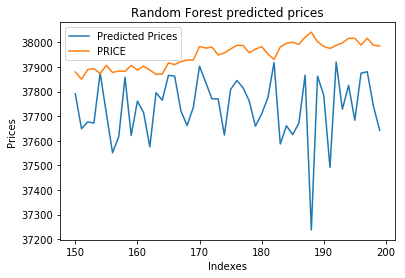

In [18]:
#Plotting the graph for the Predicted_price VS Actual Price
ax = predictions_df.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

#### LINEAR REGRESSION

In [19]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression()

In [20]:
reg.predict(numpy_df_test)

array([[37438.71409797],
       [37450.71117097],
       [37472.11722918],
       [37447.87379975],
       [37492.0885954 ],
       [37510.20947064],
       [37482.13175573],
       [37497.9413593 ],
       [37496.28259566],
       [37478.09764237],
       [37459.87162762],
       [37426.9415835 ],
       [37368.5129642 ],
       [37408.40492107],
       [37503.54753206],
       [37467.91327537],
       [37492.10244784],
       [37509.04141811],
       [37512.08042048],
       [37474.85884727],
       [37448.01761074],
       [37462.86866553],
       [37465.67404742],
       [37425.26934163],
       [37498.76376657],
       [37492.0119895 ],
       [37488.46468965],
       [37465.40331163],
       [37458.88814798],
       [37507.22054474],
       [37493.31031613],
       [37473.35659503],
       [37436.81537836],
       [37444.2855042 ],
       [37430.14008329],
       [37467.17571545],
       [37506.34929277],
       [37535.0161116 ],
       [37480.55645936],
       [37459.2171609 ],


NOTE: With the very small dataset and harvesting hundreds of tweets could only make data for just less than a week. Also the prediction is not very great in such small dataset.

#### CONCLUSION: Model did not yield much confidence to justify usage to correlate stock movement with Twitter Sentiments given the limited data.
